In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

heart = pd.read_csv('/content/drive/MyDrive/2078_Akalya_Multiple Disease/2078_Akalya_Multiple Disease/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.nunique()
uniques = heart['target'].unique()
print('macam-macam target')
for unique in uniques:
    print(unique)

macam-macam target
0
1


In [6]:
#total target sebelum duplikat data dihilangkan
heart['target'].value_counts()

,count
target,
1,526
0,499


In [8]:
heart[heart.duplicated(keep=False)]

print("heart:", heart.duplicated().sum())

heart: 723


In [9]:
heart_clean = heart.drop_duplicates()

print("heart Clean duplicated:", heart_clean.duplicated().sum())

heart Clean duplicated: 0


In [10]:
#cek informasi data bersih
heart_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
# target data bersih
heart_clean['target'].value_counts()

,count
target,
1,164
0,138


In [12]:
# outlier menggunakan IQR
Q1 = heart_clean["chol"].quantile(0.25)
Q3 = heart_clean["chol"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outlier = heart_clean[(heart_clean["chol"] < batas_bawah) | (heart_clean["chol"] > batas_atas)]
print(outlier)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
158   67    0   2       115   564    0        0      160      0      1.6   
179   56    0   0       134   409    0        0      150      1      1.9   
255   62    0   0       140   394    0        0      157      0      1.2   
450   63    0   0       150   407    0        0      154      0      4.0   

     slope  ca  thal  target  
123      2   1     2       1  
158      1   0     3       1  
179      1   2     3       0  
255      1   0     2       1  
450      1   3     3       0  


/tmp/ipython-input-3094527326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="target", data=heart_clean, palette="Set2")


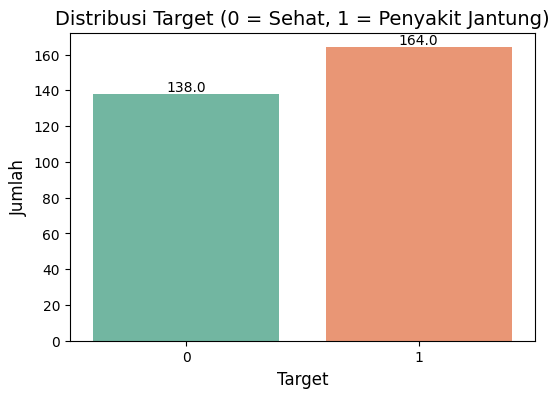

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi target
plt.figure(figsize=(6,4))
ax = sns.countplot(x="target", data=heart_clean, palette="Set2")

# Tambahkan label di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title("Distribusi Target (0 = Sehat, 1 = Penyakit Jantung)", fontsize=14)
plt.xlabel("Target", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.show()


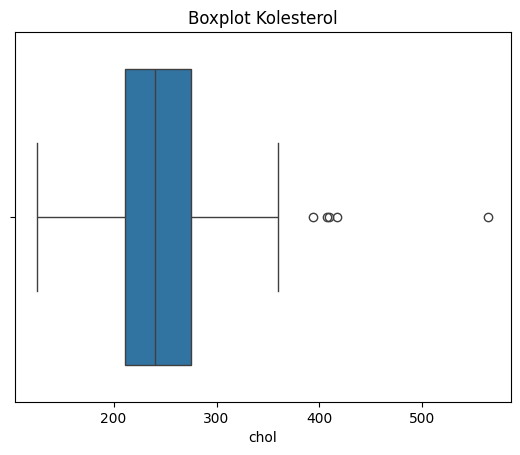

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh cek outlier pada kolom kolesterol
sns.boxplot(x=heart_clean["chol"])
plt.title("Boxplot Kolesterol")
plt.show()

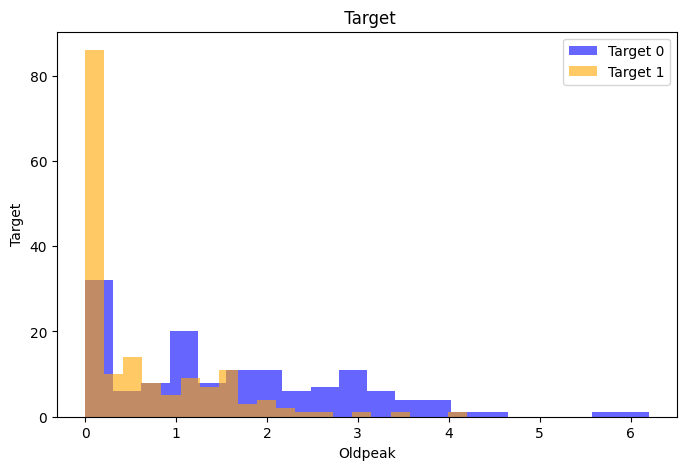

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for t, color in zip([0, 1], ['blue', 'orange']):
    subset = heart_clean[heart_clean['target'] == t]
    plt.hist(subset['oldpeak'], bins=20, alpha=0.6, color=color, label=f'Target {t}')

plt.title(' Target')
plt.xlabel('Oldpeak')
plt.ylabel('Target')
plt.legend()
plt.show()


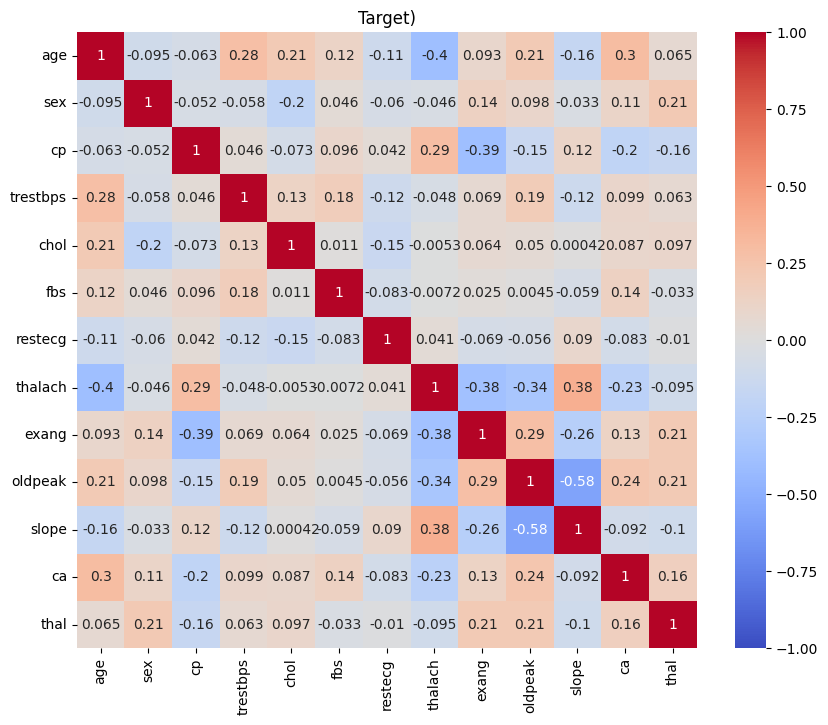

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
corr_features = heart_clean.drop("target", axis=1).corr()

sns.heatmap(corr_features,
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Target)", fontsize=12)
plt.show()

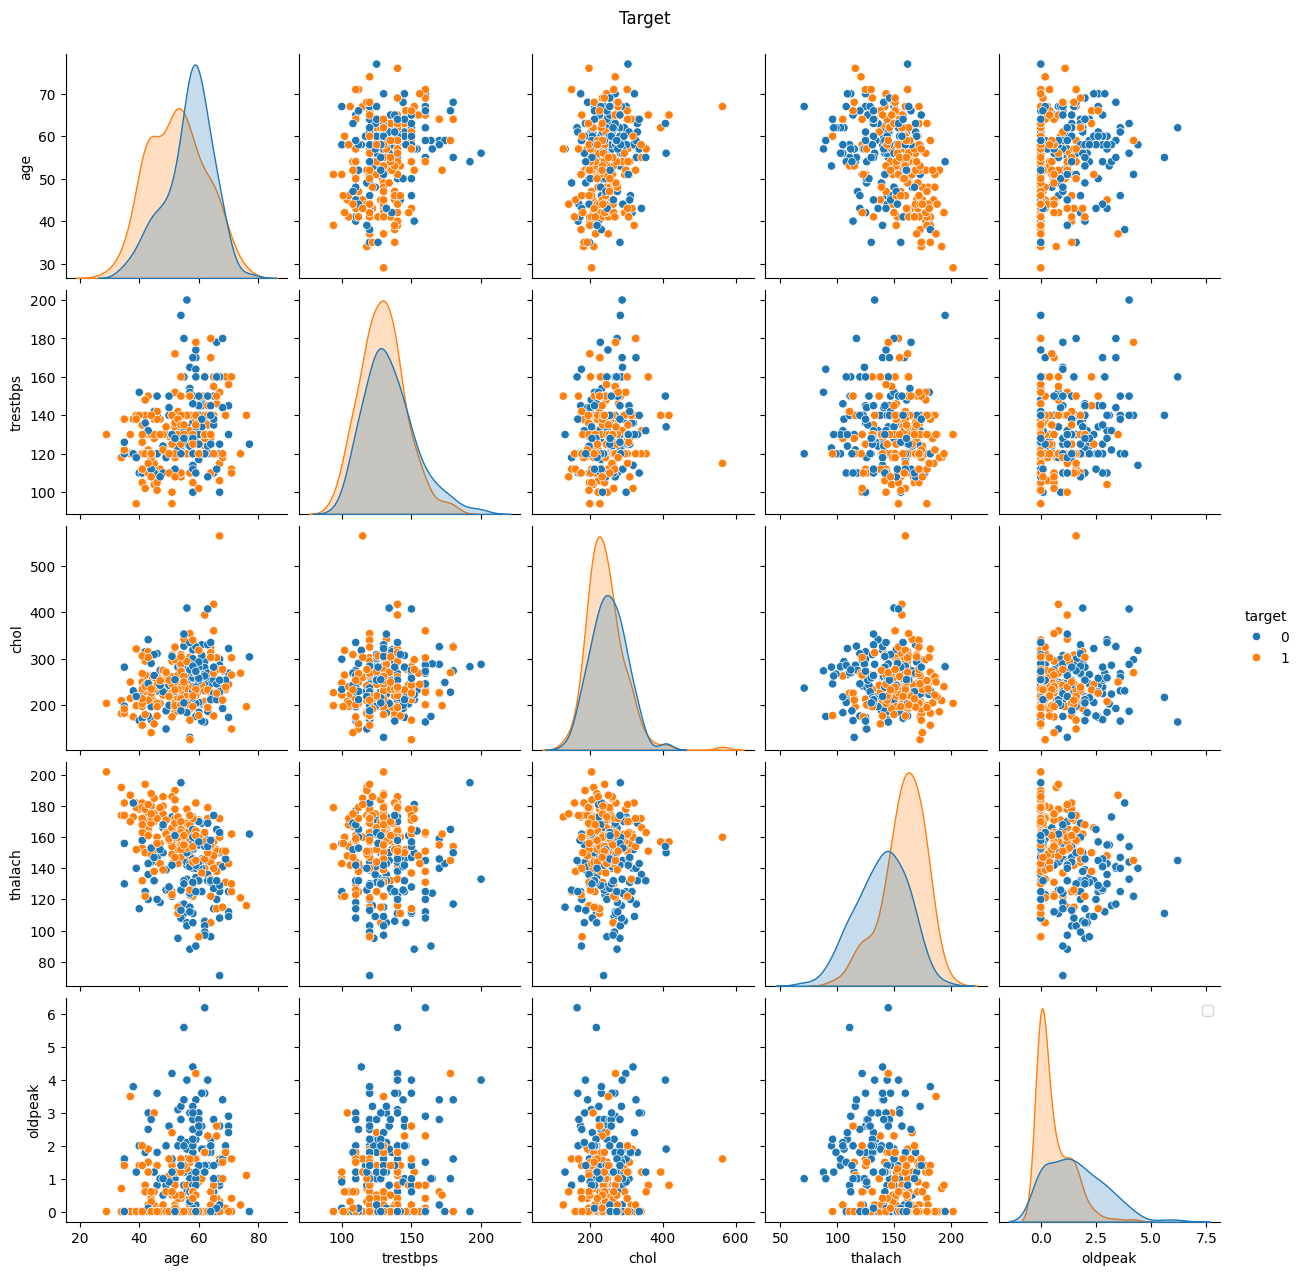

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Pairplot dengan target sebagai hue (warna)
sns.pairplot(heart_clean, hue="target", diag_kind="kde",
             vars=["age", "trestbps", "chol", "thalach", "oldpeak"])
plt.suptitle("Target", y=1.02)
plt.legend()
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = heart_clean.drop("target", axis=1)
y = heart_clean["target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (241, 13)
Test size  :  (61, 13)


In [22]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train: (241, 13)
y_train: (241,)
X_test : (61, 13)
y_test : (61,)


In [24]:

numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_cols = ["cp", "restecg", "slope", "thal"]

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_cols])
X_test_num = scaler.transform(X_test[numeric_cols])

encoder = OneHotEncoder(drop="first", sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])
print("X_train:", X_train_cat)
print("X_test:", X_test_cat)

X_train: [[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]]
X_test: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [

In [26]:
binary_cols = ["sex", "fbs", "exang"]
X_train_final = pd.concat(
    [
        pd.DataFrame(X_train_num, index=X_train.index, columns=numeric_cols),
        pd.DataFrame(X_train_cat, index=X_train.index, columns=encoder.get_feature_names_out(categorical_cols)),
        X_train[binary_cols].reset_index(drop=True)
    ],
    axis=1
)

X_test_final = pd.concat(
    [
        pd.DataFrame(X_test_num, index=X_test.index, columns=numeric_cols),
        pd.DataFrame(X_test_cat, index=X_test.index, columns=encoder.get_feature_names_out(categorical_cols)),
        X_test[binary_cols].reset_index(drop=True)
    ],
    axis=1
)

print("Shape X_train_final:", X_train_final.shape)
print("Shape X_test_final :", X_test_final.shape)

Shape X_train_final: (338, 18)
Shape X_test_final : (111, 18)


In [27]:

categorical_cols = ["cp", "restecg", "slope", "thal"]
binary_cols = ["sex", "fbs", "exang"]
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder="passthrough"
)

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
norm = 0
nonorm = 0
for col in X_train.columns:
  if X_train[col].skew() >=-0.5 and X_train[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from time import time
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

model = DecisionTreeClassifier(random_state=42)

start = time()
model.fit(X_train_scaled, y_train)
end = time()

print(f"Decision Tree training: {end-start:.4f} ")

Decision Tree training: 0.0093 


In [32]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

y_train_prob = model.predict_proba(X_train_scaled)[:,1]
y_test_prob = model.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train,y_train_pred,zero_division=0))
print('AUC Score Train:',roc_auc_score(y_train,y_train_prob))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_test_pred,zero_division=0))
print('AUC Score Test:',roc_auc_score(y_test,y_test_prob))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       131

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

AUC Score Train: 1.0


========== TEST ==========
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

AUC Score Test: 0.801948051948052


In [35]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

import pickle
import os

# ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb



# Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Order columns properly after ColumnTransformer:
# 'remainder="passthrough"' places binary_cols at the end in original order,
# So create columns list for DataFrame if needed (optional)

# Models to train
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Folder to save pickle files
pickle_folder = "/content/drive/MyDrive/2078_Akalya_Multiple Disease/2078_Akalya_Multiple Disease/HeartDiseasePickle"
os.makedirs(pickle_folder, exist_ok=True)

# Train, evaluate and save models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_processed, y_train)

    # Save model
    with open(os.path.join(pickle_folder, f"{name.replace(' ', '_')}_model.pkl"), "wb") as f:
        pickle.dump(model, f)

    # Predict on train and test
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test_processed)

    # Probabilities (for roc_auc)
    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(X_train_processed)[:, 1]
        y_test_prob = model.predict_proba(X_test_processed)[:, 1]
    else:
        y_train_prob = model.decision_function(X_train_processed)
        y_test_prob = model.decision_function(X_test_processed)

    print(f"--- {name} TRAIN classification report ---")
    print(classification_report(y_train, y_train_pred, zero_division=0))
    print(f"AUC Train: {roc_auc_score(y_train, y_train_prob):.4f}")

    print(f"--- {name} TEST classification report ---")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    print(f"AUC Test: {roc_auc_score(y_test, y_test_prob):.4f}")

print("\nAll models trained and saved successfully!")

# --------
# PREDICTION EXAMPLE on new user input
# --------

# Function to load models and preprocess user input, then predict
def predict_heart_disease(user_input_dict):
    """
    user_input_dict: dict with keys = feature names, values = feature values
    Example:
    user_input = {
        "age": 60,
        "sex": 1,
        "cp": 3,
        "trestbps": 130,
        "chol": 250,
        "fbs": 0,
        "restecg": 1,
        "thalach": 150,
        "exang": 0,
        "oldpeak": 2.3,
        "slope": 2,
        "ca": 0,
        "thal": 3
    }
    """

    # Convert input dict to DataFrame with single row
    input_df = pd.DataFrame([user_input_dict])

    # Preprocess user input same as training
    input_processed = preprocessor.transform(input_df)

    results = {}
    for name in models.keys():
        # Load model
        with open(os.path.join(pickle_folder, f"{name.replace(' ', '_')}_model.pkl"), "rb") as f:
            model = pickle.load(f)

        # Predict
        pred = model.predict(input_processed)[0]
        # Probability/confidence score
        if hasattr(model, "predict_proba"):
            prob = model.predict_proba(input_processed)[0][1]
        else:
            prob = None

        label = "Positive" if pred == 1 else "Negative"

        results[name] = {"Prediction": label, "Probability": prob}

    return results




Training Decision Tree...
--- Decision Tree TRAIN classification report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       131

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

AUC Train: 1.0000
--- Decision Tree TEST classification report ---
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        28
           1       0.72      0.79      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

AUC Test: 0.7154

Training Random Forest...
--- Random Forest TRAIN classification report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110

In [36]:
# Example user input (adjust these values as per your data schema)
user_input = {
    "age": 60,
    "sex": 1,
    "cp": 3,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 2.3,
    "slope": 2,
    "ca": 0,
    "thal": 3
}

# Run prediction
prediction_results = predict_heart_disease(user_input)

print("\nPrediction results for user input:")
for model_name, result in prediction_results.items():
    prob_str = f", Probability: {result['Probability']:.4f}" if result['Probability'] is not None else ""
    print(f"{model_name}: {result['Prediction']}{prob_str}")



Prediction results for user input:
Decision Tree: Positive, Probability: 1.0000
Random Forest: Negative, Probability: 0.4900
KNN: Negative, Probability: 0.2000
SVM: Positive, Probability: 0.5889
XGBoost: Positive, Probability: 0.6165
